In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import uszipcode
import numpy as numpy
import time
import requests
import json
import warnings
warnings.filterwarnings('ignore')

In [51]:
CDIA_df = pd.read_csv("data\\U.S._Chronic_Disease_Indicators__Alcohol1.csv",header=0, thousands=r',', dtype={'DataValueAlt': numpy.float64})
CDIA_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueTypeID,...,TopicID,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2016,2016,US,United States,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,59,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2016,2016,AL,Alabama,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,1,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2016,2016,AK,Alaska,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,2,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2016,2016,AZ,Arizona,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,4,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2016,2016,AR,Arkansas,BRFSS,Alcohol,Binge drinking prevalence among adults aged >=...,NaN,%,CRDPREV,...,ALC,ALC2_2,NaN,5,OVERALL,OVR,NaN,NaN,NaN,NaN


In [52]:
# mean of the BingeDrinking Data by state and year
binge_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC2_2') 
& (CDIA_df['DataValueType'] =='Age-adjusted Prevalence')
& (CDIA_df['DataSource'] =='BRFSS')                       
& (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
binge_df

LocationDesc   YearStart
Alabama        2011         14.2
               2012         13.0
               2013         11.7
               2014         12.8
               2015         12.2
               2016         13.8
Alaska         2011         20.1
               2012         16.2
               2013         19.5
               2014         19.8
               2015         20.0
               2016         17.8
Arizona        2011         17.7
               2012         15.9
               2013         13.8
               2014         15.7
               2015         14.9
               2016         16.5
Arkansas       2011         15.0
               2012         12.3
               2013         13.4
               2014         14.1
               2015         15.1
               2016         15.9
California     2011         18.5
               2012         17.0
               2013         17.7
               2014         15.6
               2015         16.6
               201

In [53]:
binge_df1 = binge_df.unstack(1)
binge_df1

YearStart,2011,2012,2013,2014,2015,2016
LocationDesc,,,,,,
Alabama,14.2,13.0,11.7,12.8,12.2,13.8
Alaska,20.1,16.2,19.5,19.8,20.0,17.8
Arizona,17.7,15.9,13.8,15.7,14.9,16.5
Arkansas,15.0,12.3,13.4,14.1,15.1,15.9
California,18.5,17.0,17.7,15.6,16.6,16.5
Colorado,20.3,19.4,18.8,17.8,18.0,19.5
Connecticut,19.1,18.5,19.5,17.1,18.2,18.1
Delaware,21.4,19.7,18.2,16.8,15.7,18.0
District of Columbia,23.9,21.3,20.8,22.7,24.4,24.2


In [1]:
####  tURNED OFF FOR SPACE
#plot graph of binge drinking for all states by year and value
#binge_df1.drop('United States').T.plot(kind='line', legend='reverse', ylim=(0,30), figsize=(15,15))

In [55]:
binge_df2 = binge_df.drop('United States').groupby(['YearStart']).mean()
binge_df2

YearStart
2011    18.858491
2012    17.675472
2013    17.364151
2014    17.196226
2015    17.241509
2016    17.964815
Name: DataValueAlt, dtype: float64

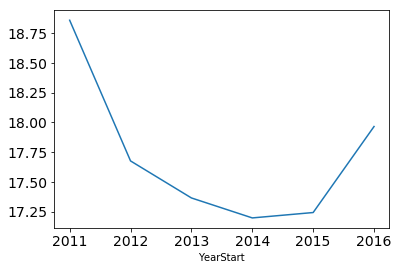

In [56]:
binge_plot = binge_df2.plot(kind='line', y = 'YearStart',  
  legend = False, fontsize=14)
binge_plot

In [57]:
#mean of the Heavy drinking by state and year
heavy_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC5_1') 
& (CDIA_df['DataValueType'] =='Age-adjusted Prevalence')                       
& (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
heavy_df 

LocationDesc   YearStart
Alabama        2011          5.2
               2012          5.4
               2013          4.4
               2014          4.6
               2015          5.1
               2016          5.6
Alaska         2011          7.4
               2012          6.4
               2013          8.3
               2014          8.6
               2015          8.5
               2016          6.2
Arizona        2011          6.8
               2012          5.1
               2013          6.3
               2014          5.9
               2015          5.2
               2016          6.2
Arkansas       2011          6.5
               2012          4.2
               2013          5.1
               2014          5.2
               2015          5.6
               2016          5.5
California     2011          6.2
               2012          5.7
               2013          6.4
               2014          5.6
               2015          5.7
               201

In [58]:
heavy_df1 = heavy_df.unstack(1)

heavy_df1

YearStart,2011,2012,2013,2014,2015,2016
LocationDesc,,,,,,
Alabama,5.2,5.4,4.4,4.6,5.1,5.6
Alaska,7.4,6.4,8.3,8.6,8.5,6.2
Arizona,6.8,5.1,6.3,5.9,5.2,6.2
Arkansas,6.5,4.2,5.1,5.2,5.6,5.5
California,6.2,5.7,6.4,5.6,5.7,5.9
Colorado,6.6,6.4,6.7,6.5,5.8,6.8
Connecticut,6.8,6.4,6.4,5.7,6.1,5.7
Delaware,7.6,6.9,6.6,5.2,5.3,6.7
District of Columbia,9.2,7.7,6.2,8.7,8.8,10.8


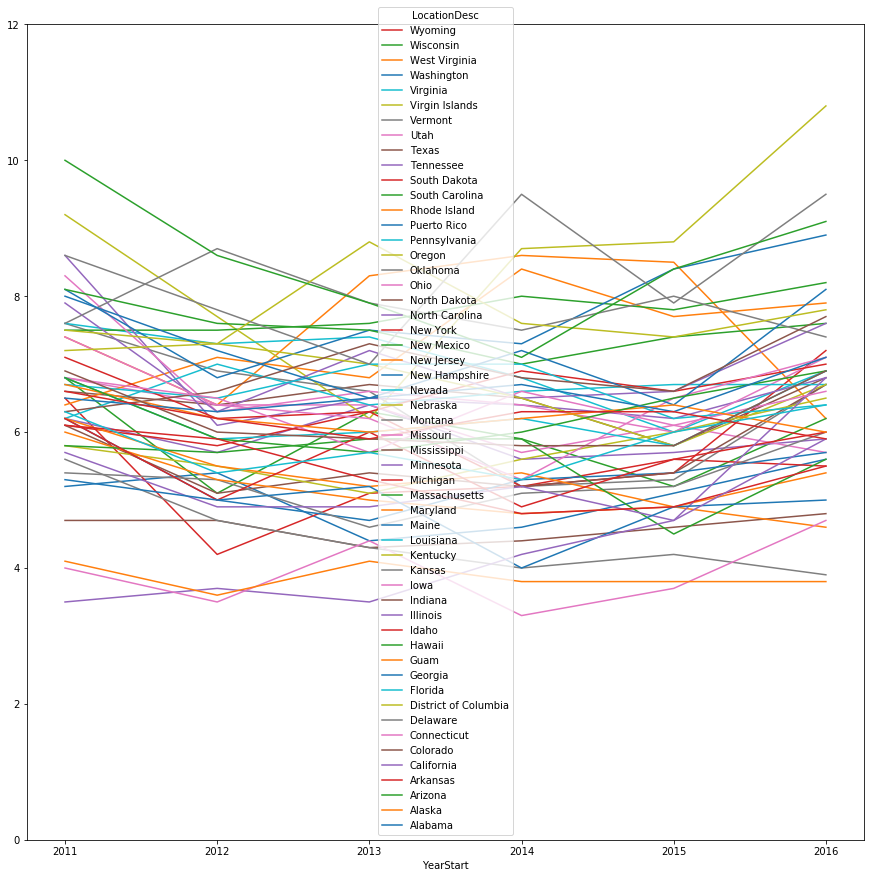

In [59]:
#plot graph of heavy drinking for all states by year and value
heavy_df1.drop('United States').T.plot(kind='line', legend='reverse', ylim=(0,12), figsize=(15,15))

In [60]:
heavy_df2 = heavy_df.drop('United States').groupby(['YearStart']).mean()
heavy_df2

YearStart
2011    6.671698
2012    6.064151
2013    6.101887
2014    6.056604
2015    6.050943
2016    6.588889
Name: DataValueAlt, dtype: float64

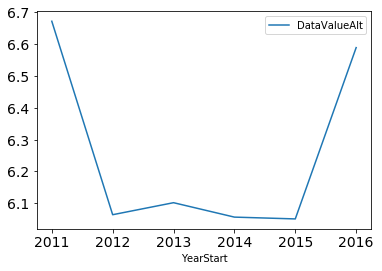

In [61]:
heavy_plot = heavy_df2.plot(kind='line', y = 'YearStart', legend = True, fontsize=14,)
heavy_plot


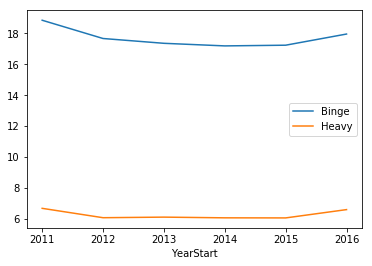

In [62]:
a1_df = pd.concat([binge_df2, heavy_df2], axis=1)
a1_df.columns = ['Binge', 'Heavy']
a1_df.plot(kind='line')


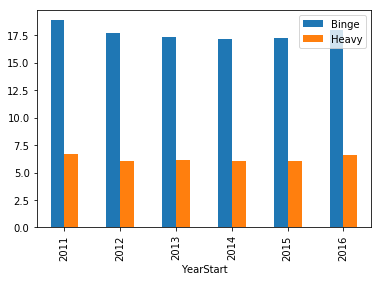

In [63]:
a1_df = pd.concat([binge_df2, heavy_df2], axis=1)
a1_df.columns = ['Binge', 'Heavy']
a1_df.plot(kind='bar')

In [64]:
cldm_df = CDIA_df.loc[  (CDIA_df['QuestionID'] =='ALC6_0') 
& (CDIA_df['DataSource'] =='NVSS')
& (CDIA_df['DataValueType'] =='Age-adjusted Rate')
& (CDIA_df['Stratification1'] =='Overall')].groupby(['LocationDesc','YearStart'])['DataValueAlt'].mean()
cldm_df 

LocationDesc   YearStart
Alabama        2010          9.4
               2011          9.9
               2012         11.0
               2013         10.1
               2014         11.8
Alaska         2010          9.8
               2011         13.0
               2012         12.6
               2013         11.3
               2014         10.7
Arizona        2010         12.7
               2011         13.5
               2012         13.9
               2013         14.7
               2014         14.3
Arkansas       2010          9.9
               2011          9.4
               2012          9.5
               2013          9.8
               2014         10.4
California     2010         11.3
               2011         11.7
               2012         11.7
               2013         11.8
               2014         12.0
Colorado       2010         11.2
               2011         12.3
               2012         11.7
               2013         12.6
               201

In [65]:
cldm_df1 = cldm_df.unstack(1)
cldm_df1

YearStart,2010,2011,2012,2013,2014
LocationDesc,,,,,
Alabama,9.4,9.9,11.0,10.1,11.8
Alaska,9.8,13.0,12.6,11.3,10.7
Arizona,12.7,13.5,13.9,14.7,14.3
Arkansas,9.9,9.4,9.5,9.8,10.4
California,11.3,11.7,11.7,11.8,12.0
Colorado,11.2,12.3,11.7,12.6,12.7
Connecticut,7.3,7.3,7.8,7.7,8.5
Delaware,8.8,8.6,7.0,7.2,9.3
District of Columbia,8.9,6.8,8.5,8.1,7.7


In [66]:
#plot graph of chronic liver disease mortality for all states by year and value

In [67]:
# Total mean of all states per year
cldm_df2 =cldm_df.drop('United States').groupby(['YearStart']).mean()
cldm_df2

YearStart
2010     9.307843
2011     9.821569
2012    10.043137
2013    10.268627
2014    10.484314
Name: DataValueAlt, dtype: float64

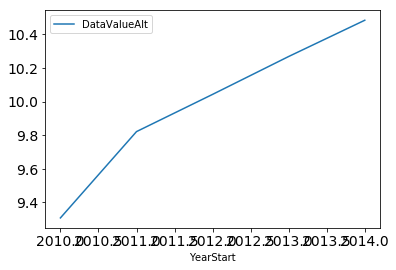

In [68]:
cldm_df2.plot(kind='line', y = 'YearStart',  
  legend = True, fontsize=14)

In [ ]:
# pie charts
